In [22]:
if '__IPYTHON__' in globals():
    from IPython import get_ipython
    ipython = get_ipython()
    ipython.magic('load_ext autoreload')
    ipython.magic('autoreload 2')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (6.5, 6)
pd.options.display.max_rows = 10
pd.options.display.max_rows = 10

import warnings
warnings.filterwarnings("ignore")

### Functions

In [23]:
def replace_labels(ax, char="%", axis='y'):
    # Customize y-labels
    if axis == 'x':
        _ = ticks_loc = ax.get_xticks().tolist()
        _ = ax.set_xticks(ticks_loc)
        _ = ax.set_xticklabels([f'{x:,.0f}{char}' for x in ticks_loc])
    if axis == 'y':
        _ = ticks_loc = ax.get_yticks().tolist()
        _ = ax.set_yticks(ticks_loc)
        _ = ax.set_yticklabels([f'{x:,.0f}{char}' for x in ticks_loc])
        
def custom_barplot(x, y, **kwargs):
    ax = sns.barplot(x=x, y=y*100)
    replace_labels(ax, "%")

def custom_countplot(x, y, **kwargs):
    ax = sns.barplot(x=x, y=y, estimator=lambda x: len(x) / len(df) * 100)
    replace_labels(ax, "%")

def custom_boxplot(X, **kwargs):
    ax = sns.boxplot(x=X)

def custom_displot(X, **kwargs):
    ax = sns.distplot(x=X)
    
def get_samples_avgs(df, cat, cat_val, sample_size=20, n_samples=100, response="Loan_Status"):
    return np.array([df.loc[df[cat]==cat_val, response].sample(sample_size).mean() for i in range(n_samples)])

def get_test_result(name, score, p_value, significance=0.05):
    # Test the p-value
    print(f"{name}")
    #print(f"Significance: {significance:0.2f}, Score: {score:0.2f}.")
    if (p_value < significance):
        print(f"H0 can be rejected! (p-value: {p_value:0.2f})")
    else:
        print(f"Fail to reject H0 (p-value: {p_value:0.2f})")

### 1. Import Data

In [24]:
df = pd.read_csv("data/train.csv")

### 2. Explore Data

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
missing = df.isnull().sum()
missing[missing>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

### 2.1 Data Distribution

#### Overall

About 69% of the loans were approved, against 31% rejected.

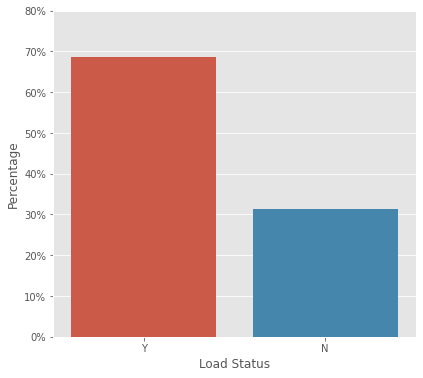

In [30]:

loan_stt = df['Loan_Status'].value_counts(normalize=True)*100
_ = ax = sns.barplot(loan_stt.index, loan_stt)
_ = ax.set_ylabel("Percentage")
_ = ax.set_xlabel("Load Status")
replace_labels(ax, "%")

#### Categorical

Ploting the variables count, we see that:
* 80% of applicants are men
* Close to 14% are self-employed
* 65% are married
* Near of 84% repaid his debts.

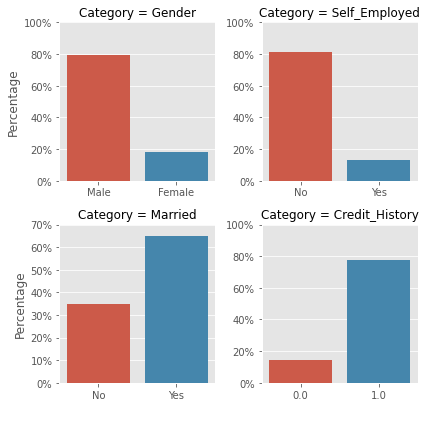

In [31]:

df["Loan_Status"] = df["Loan_Status"].map({"Y":1, "N":0})
nominal_cat = df[["Gender", "Self_Employed","Married","Credit_History","Loan_Status"]]
melted_cat_vars = pd.melt(nominal_cat, id_vars=["Loan_Status"],var_name='Category')

g = sns.FacetGrid(
        melted_cat_vars, col="Category", sharex=False, sharey=False, col_wrap=2
    )
g.map(custom_countplot, "value", "Loan_Status")
g.set_axis_labels(y_var="Percentage",x_var=" ")


#### Ordinal

* 57% of the applicants have no dependents
* 78% of the applicants are graduated
* Most of the applicants are from the semi-urban area

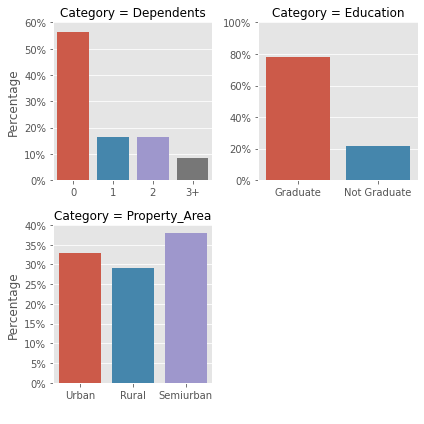

In [32]:

ordinal_cat = df[['Dependents','Education', 'Property_Area','Loan_Status']]
melted_cat_vars = pd.melt(ordinal_cat, id_vars=["Loan_Status"],var_name='Category')

g = sns.FacetGrid(
        melted_cat_vars, col="Category", sharex=False, sharey=False, col_wrap=2
    )
g.map(custom_countplot, "value", "Loan_Status")
g.set_axis_labels(y_var="Percentage",x_var=" ")
plt.tight_layout()

#### Numerical

* The three variables have outliers
* Loan amount seems to be fairly normal.

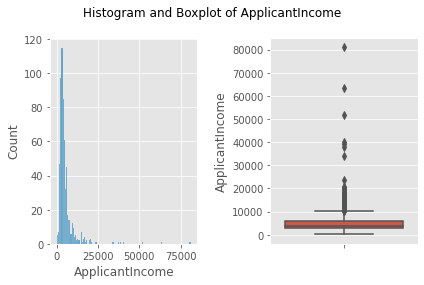

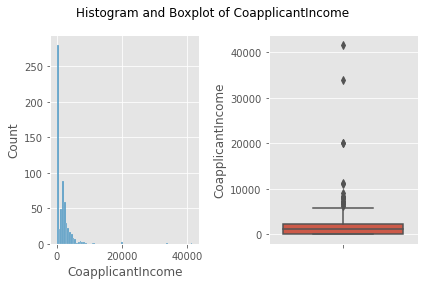

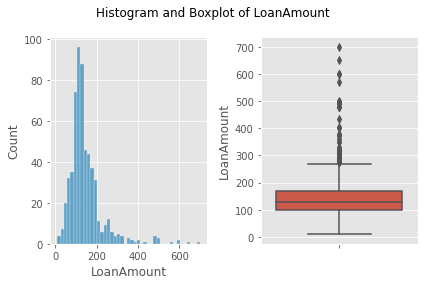

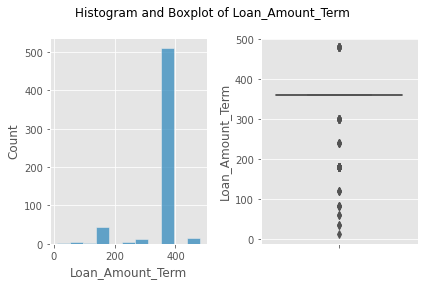

In [33]:

numerical_cols = df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
for col, values in numerical_cols.iteritems():
    fig, ax = plt.subplots(1,2, figsize=(6,4))
    sns.histplot(values, ax=ax[0])
    sns.boxplot(y=values, ax=ax[1])
    fig.suptitle('Histogram and Boxplot of ' + col)
    plt.tight_layout()

### 2.2 Approval rate

#### Nominal Categories

The _approval rate_ among genders seems to be roughly the same, about 69% for men and 66% for women, we can say the same for the self employed status.

Looking at the Marriage status, there is a significant difference in the _approval rate_, and the Credit History seems to be heavily important to the outcome of the loan eligibility.

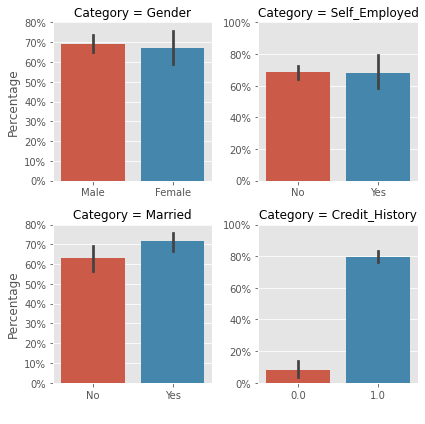

In [34]:

nominal_cat = df[["Gender", "Self_Employed","Married","Credit_History","Loan_Status"]]
melted_cat_vars = pd.melt(nominal_cat, id_vars=["Loan_Status"],var_name='Category')

g = sns.FacetGrid(
        melted_cat_vars, col="Category", sharex=False, sharey=False, col_wrap=2
    )
g.map(custom_barplot, "value", "Loan_Status")
g.set_axis_labels(y_var="Percentage",x_var=" ")
plt.tight_layout()

These hyphotesis may be not true, so let's use statistical tests to confirm or refute.

The null hypothesis is that Gender, Self Employed status, Marriage Status, or Credit history,  doesn't affect the `approval rate`, in other words, "nothing special is going on", and the observed difference is due to chance.

$H_0:$ There is **no association** between Loan_Status and other factor<br>
$H_A:$ There is **an association** between Loan_Status and other factor

In [35]:

categorical = ["Gender", "Self_Employed", "Married", "Credit_History"]

for cat in categorical:

    contigency_table = pd.crosstab(df[cat],df['Loan_Status'])
    chi2, p, _ , _ = stats.chi2_contingency(contigency_table)
    get_test_result(name=f"H0 - The approval rate is independent from {cat}:", score=chi2, p_value=p)

H0 - The approval rate is independent from Gender:
Fail to reject H0 (p-value: 0.71)
H0 - The approval rate is independent from Self_Employed:
Fail to reject H0 (p-value: 1.00)
H0 - The approval rate is independent from Married:
H0 can be rejected! (p-value: 0.03)
H0 - The approval rate is independent from Credit_History:
H0 can be rejected! (p-value: 0.00)


Summary

* The _approval rate_ is independent from **Gender**.
* The _approval rate_ is independent from **Self_Employeed** Status.
* The _approval rate_ seems to be dependent from **Marriage** Status, but the p-value is very close to 0.05, so needs to be checked.
* The _approval rate_ is dependent from **Credit_History**

#### Ordinal Categories

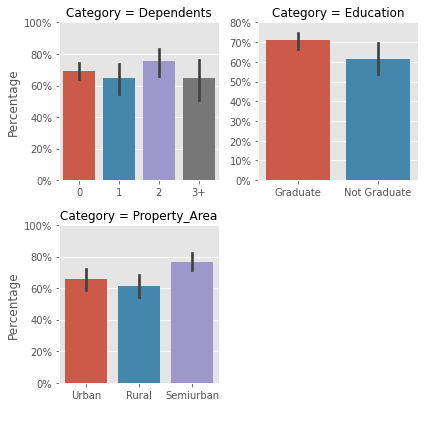

In [36]:

ordinal_cat = df[['Dependents','Education', 'Property_Area','Loan_Status']]
melted_cat_vars = pd.melt(ordinal_cat, id_vars=["Loan_Status"],var_name='Category')

g = sns.FacetGrid(
        melted_cat_vars, col="Category", sharex=False, sharey=False, col_wrap=2
    )
g.map(custom_barplot, "value", "Loan_Status")
g.set_axis_labels(y_var="Percentage",x_var=" ")
plt.tight_layout()

In [37]:

ordinals = ["Dependents", "Education", "Property_Area"]

for ord in ordinals:
    contigency_table = pd.crosstab(df[ord],df['Loan_Status'])
    chi2, p, _ , _ = stats.chi2_contingency(contigency_table)
    get_test_result(name=f"H0 - The approval rate is independent from {ord}:", score=chi2, p_value=p)

H0 - The approval rate is independent from Dependents:
Fail to reject H0 (p-value: 0.37)
H0 - The approval rate is independent from Education:
H0 can be rejected! (p-value: 0.04)
H0 - The approval rate is independent from Property_Area:
H0 can be rejected! (p-value: 0.00)


Summary

* The _approval rate_ is independent from the number of **Dependents**.
* The _approval rate_ seems to be dependent from the **Education** level, but because is very close to 0.05, needs to be checked.
* The _approval rate_ is dependent from the **Property_Area**.

#### Numerical

* The approval rate is dependent from all numerical variables

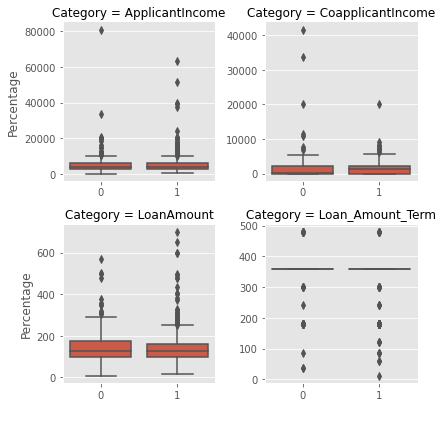

In [38]:

numerical_vars = df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']]

melted_num_vars = pd.melt(numerical_vars, id_vars=["Loan_Status"],var_name='Category')

g = sns.FacetGrid(
        melted_num_vars, col="Category", sharex=False, sharey=False, col_wrap=2
    )
g.map(sns.boxplot, "Loan_Status", "value")
g.set_axis_labels(y_var="Percentage",x_var=" ")
plt.tight_layout()

In [39]:

numerical = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for num in numerical:
    F, p = stats.f_oneway(df[num].dropna(), df["Loan_Status"])
    get_test_result(name=f"H0 - The approval rate is independent from {num}:", score=F, p_value=p)

H0 - The approval rate is independent from ApplicantIncome:
H0 can be rejected! (p-value: 0.00)
H0 - The approval rate is independent from CoapplicantIncome:
H0 can be rejected! (p-value: 0.00)
H0 - The approval rate is independent from LoanAmount:
H0 can be rejected! (p-value: 0.00)
H0 - The approval rate is independent from Loan_Amount_Term:
H0 can be rejected! (p-value: 0.00)


### 2.3 Correlations

* _ApplicationIncome_ and _LoanAmount_ are highly correlated
* *Credit_History* and *Loan_Status* are moderated correlated
* _LoanAmount_ and _CoapplicationIncome_ are weakly correlated

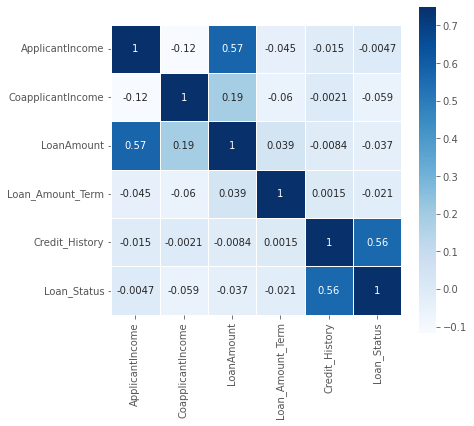

In [40]:

g = sns.heatmap (df.corr(), vmax = .75, square = True, cmap = "Blues", linewidths=.5, annot=True)